In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json
import os


os.makedirs("figs/", exist_ok=True)

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 24
plt.rcParams['mathtext.fontset'] = 'stix'  # The setting of math fontZ

In [2]:
TPE_OPT = "_".join([
    "quantile=linear",
    "alpha=0.15",
    "weight=expected-improvement",
    # "magic-clip-exponent=1.0",
    "magic-clip-exponent=2.0",
    "heuristic=hyperopt",
    "min_bandwidth_factor=0.1",
])
target_names = os.listdir(f"results-bandwidth/{TPE_OPT}")
print(target_names)

['Perm_10d.json', 'Schwefel_05d.json', 'Rosenbrock_10d.json', 'Rastrigin_30d.json', 'KTablet_10d.json', 'Sphere_05d.json', 'Rosenbrock_30d.json', 'WeightedSphere_10d.json', 'WeightedSphere_30d.json', 'cifar10.json', 'Styblinski_10d.json', 'Ackley_30d.json', 'parkinsons_telemonitoring.json', 'Levy_30d.json', 'XinSheYang_30d.json', 'Sphere_10d.json', 'Griewank_05d.json', 'Ackley_10d.json', 'car.json', 'Levy_05d.json', 'Sphere_30d.json', 'segment.json', 'Griewank_10d.json', 'naval_propulsion.json', 'KTablet_05d.json', 'phoneme.json', 'Styblinski_30d.json', 'Rosenbrock_05d.json', 'Schwefel_30d.json', 'Perm_30d.json', 'XinSheYang_05d.json', 'credit_g.json', 'XinSheYang_10d.json', 'fashion_mnist.json', 'australian.json', 'Rastrigin_05d.json', 'blood_transfusion.json', 'Perm_05d.json', 'Rastrigin_10d.json', 'WeightedSphere_05d.json', 'Ackley_05d.json', 'vehicle.json', 'kc1.json', 'colorectal_histology.json', 'KTablet_30d.json', 'Griewank_30d.json', 'Schwefel_10d.json', 'Levy_10d.json', 'Stybl

Pass hebo for results/hebo/Ackley_05d.json
Pass hebo for results/hebo/Ackley_10d.json
Pass hebo for results/hebo/Ackley_30d.json
Pass hebo for results/hebo/Griewank_05d.json
Pass hebo for results/hebo/Griewank_10d.json
Pass hebo for results/hebo/Griewank_30d.json
Pass hebo for results/hebo/KTablet_05d.json
Pass hebo for results/hebo/KTablet_10d.json
Pass hebo for results/hebo/KTablet_30d.json
Pass hebo for results/hebo/Levy_05d.json
Pass hebo for results/hebo/Levy_10d.json
Pass hebo for results/hebo/Levy_30d.json
Pass turbo for results/turbo/Levy_30d.json
Pass hebo for results/hebo/Perm_05d.json
Pass hebo for results/hebo/Perm_10d.json
Pass hebo for results/hebo/Perm_30d.json
Pass hebo for results/hebo/Rastrigin_05d.json
Pass hebo for results/hebo/Rastrigin_10d.json
Pass hebo for results/hebo/Rastrigin_30d.json
Pass hebo for results/hebo/Rosenbrock_05d.json
Pass hebo for results/hebo/Rosenbrock_10d.json
Pass hebo for results/hebo/Rosenbrock_30d.json
Pass turbo for results/turbo/Rosenbr

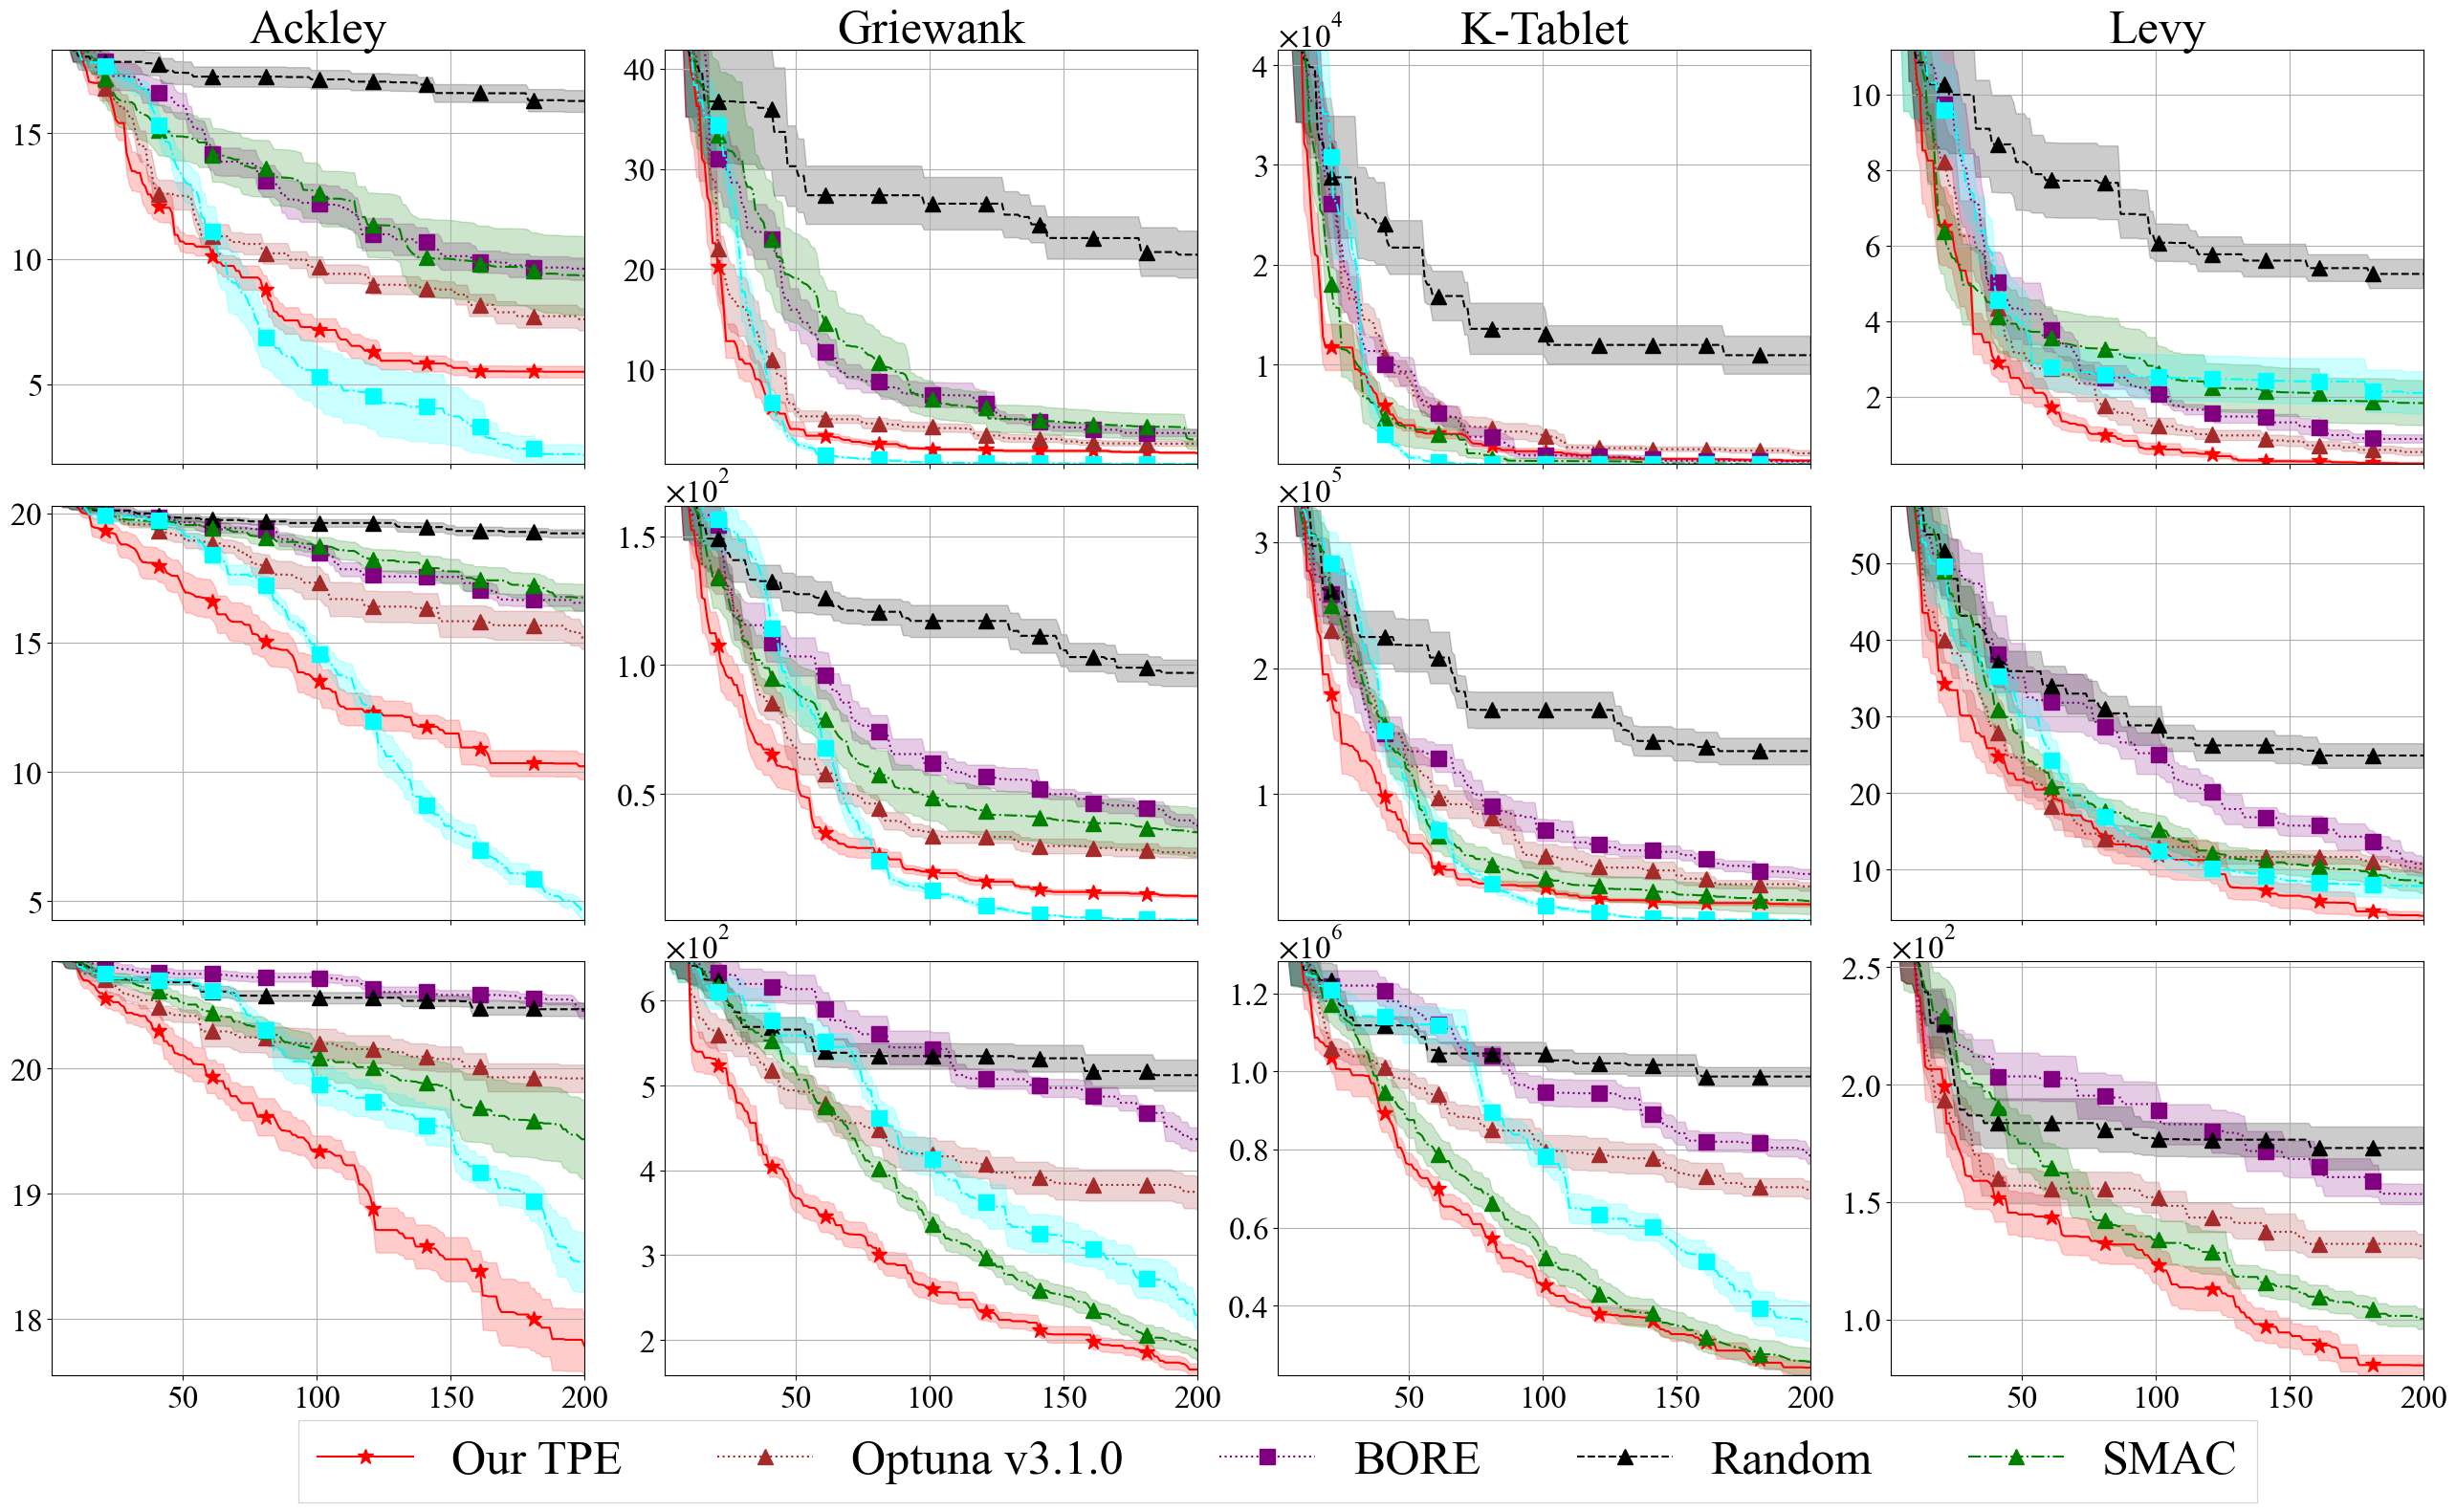

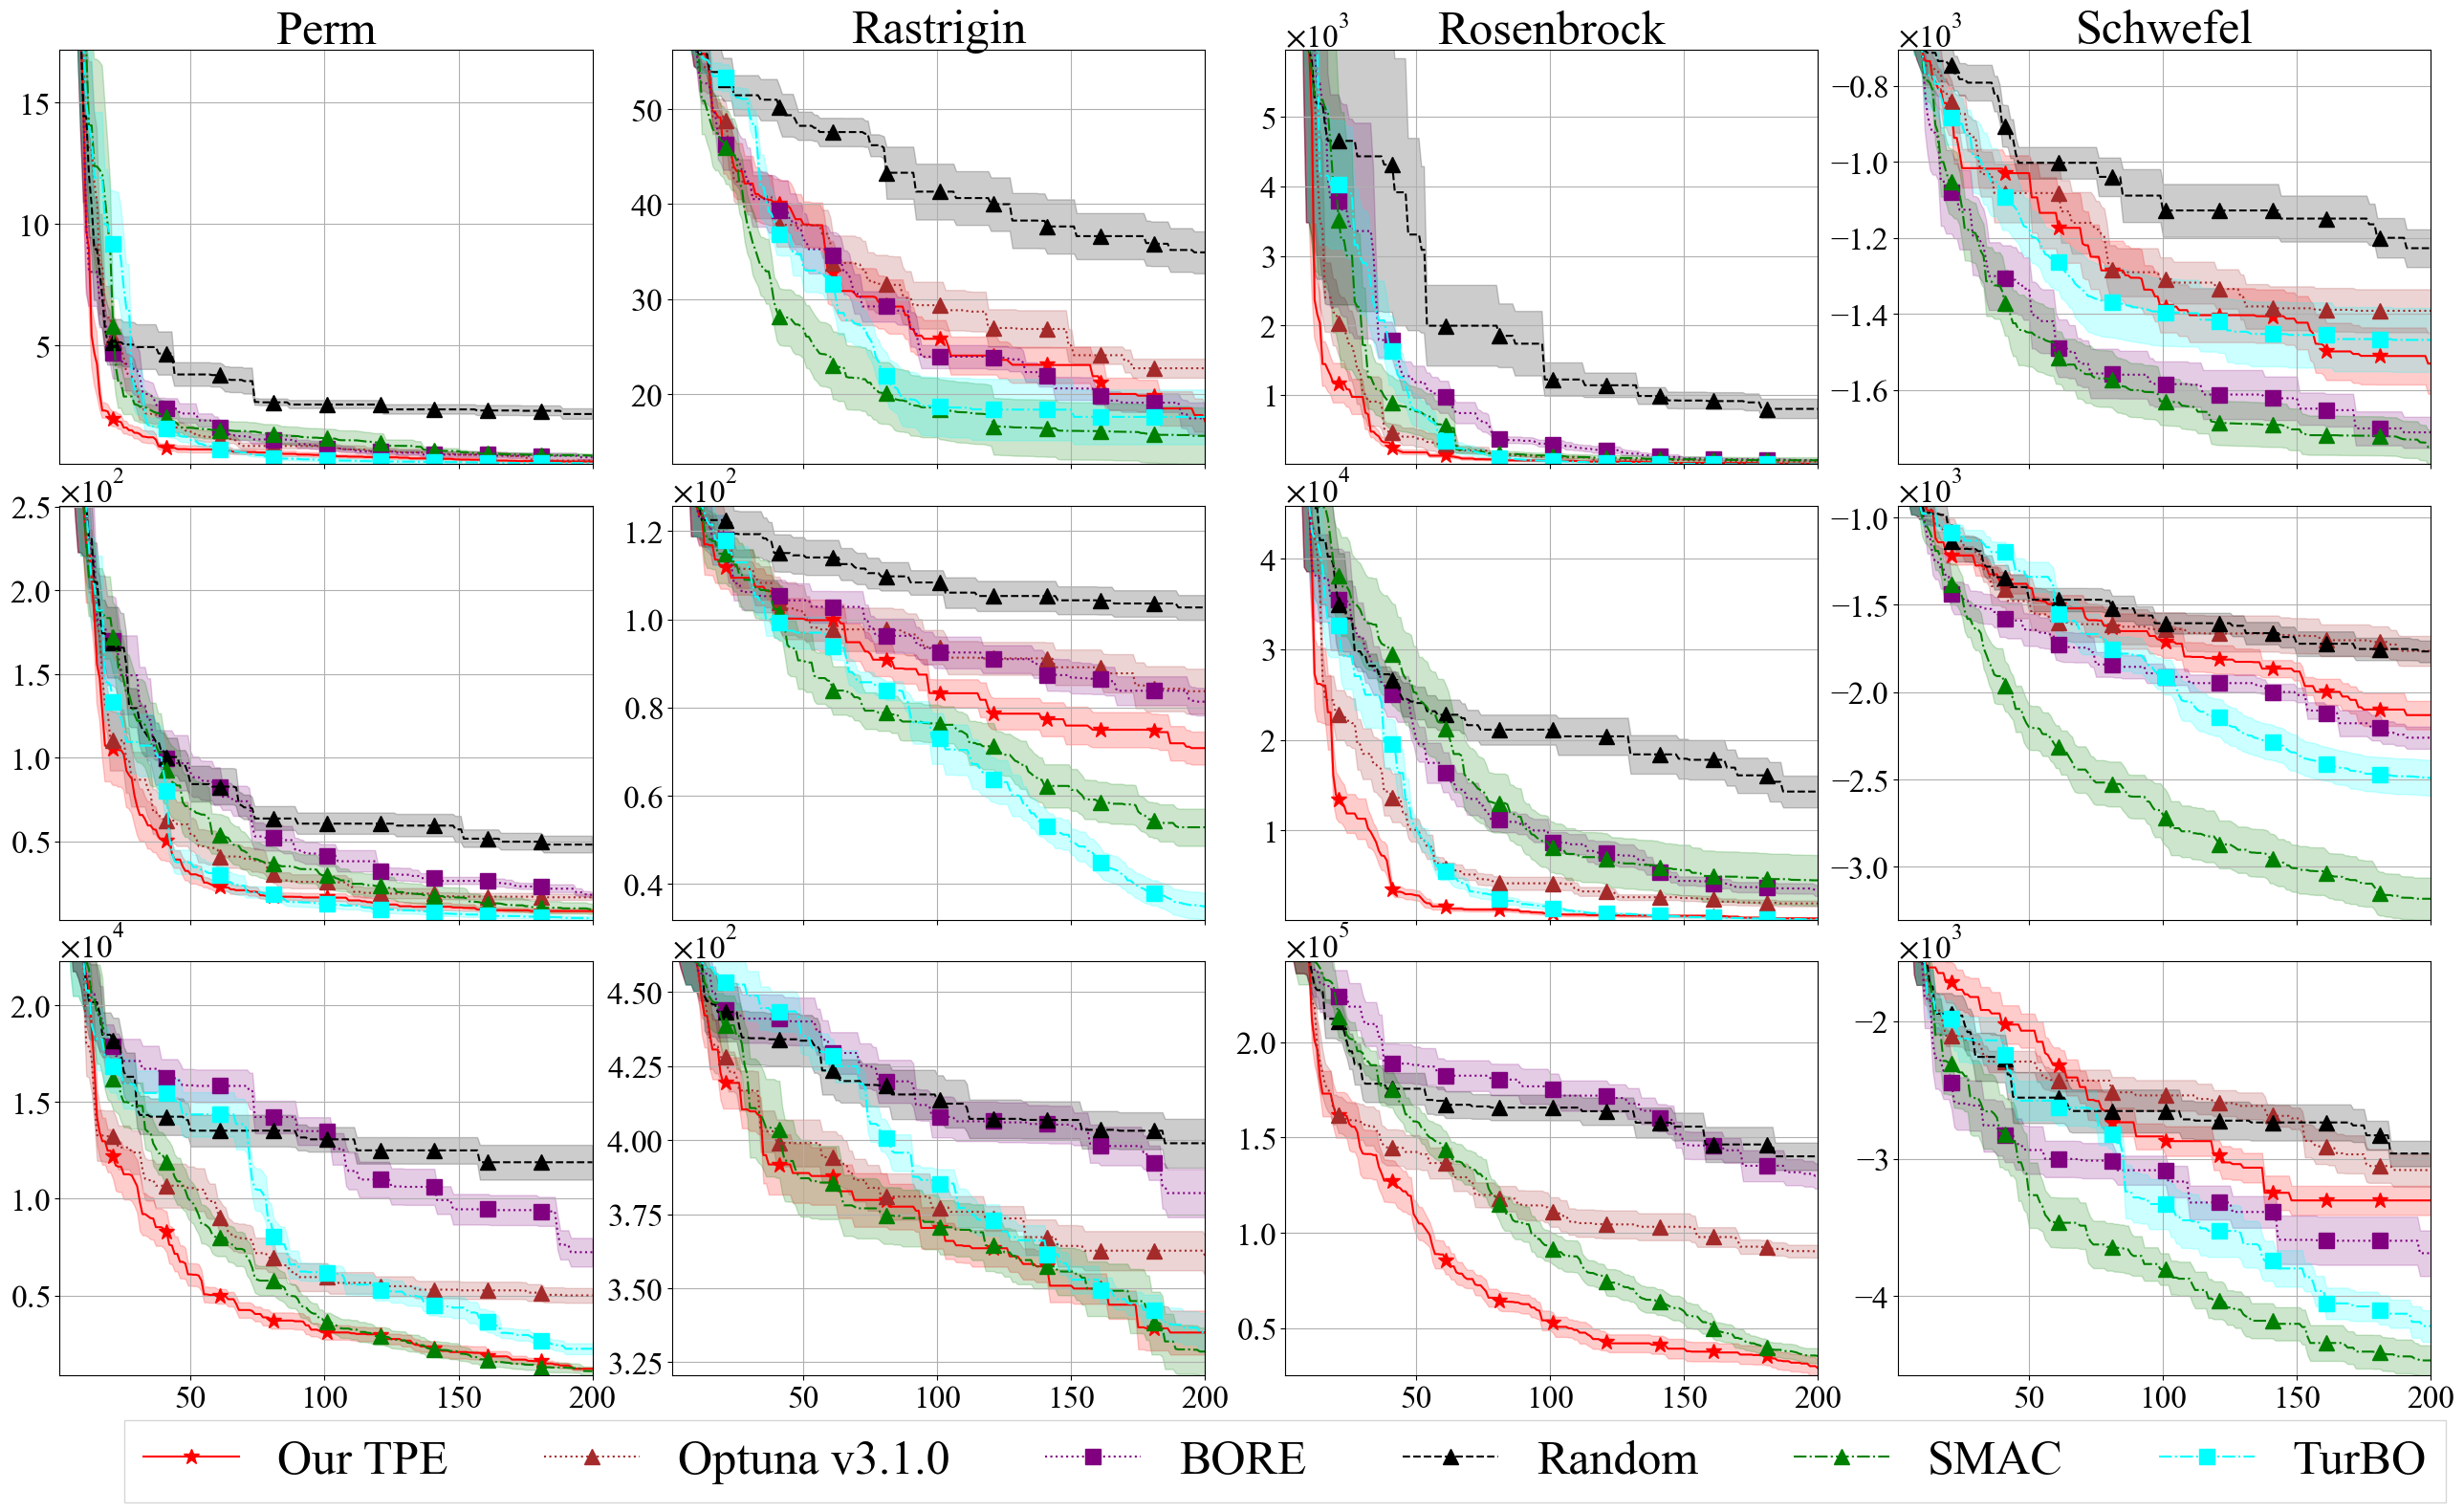

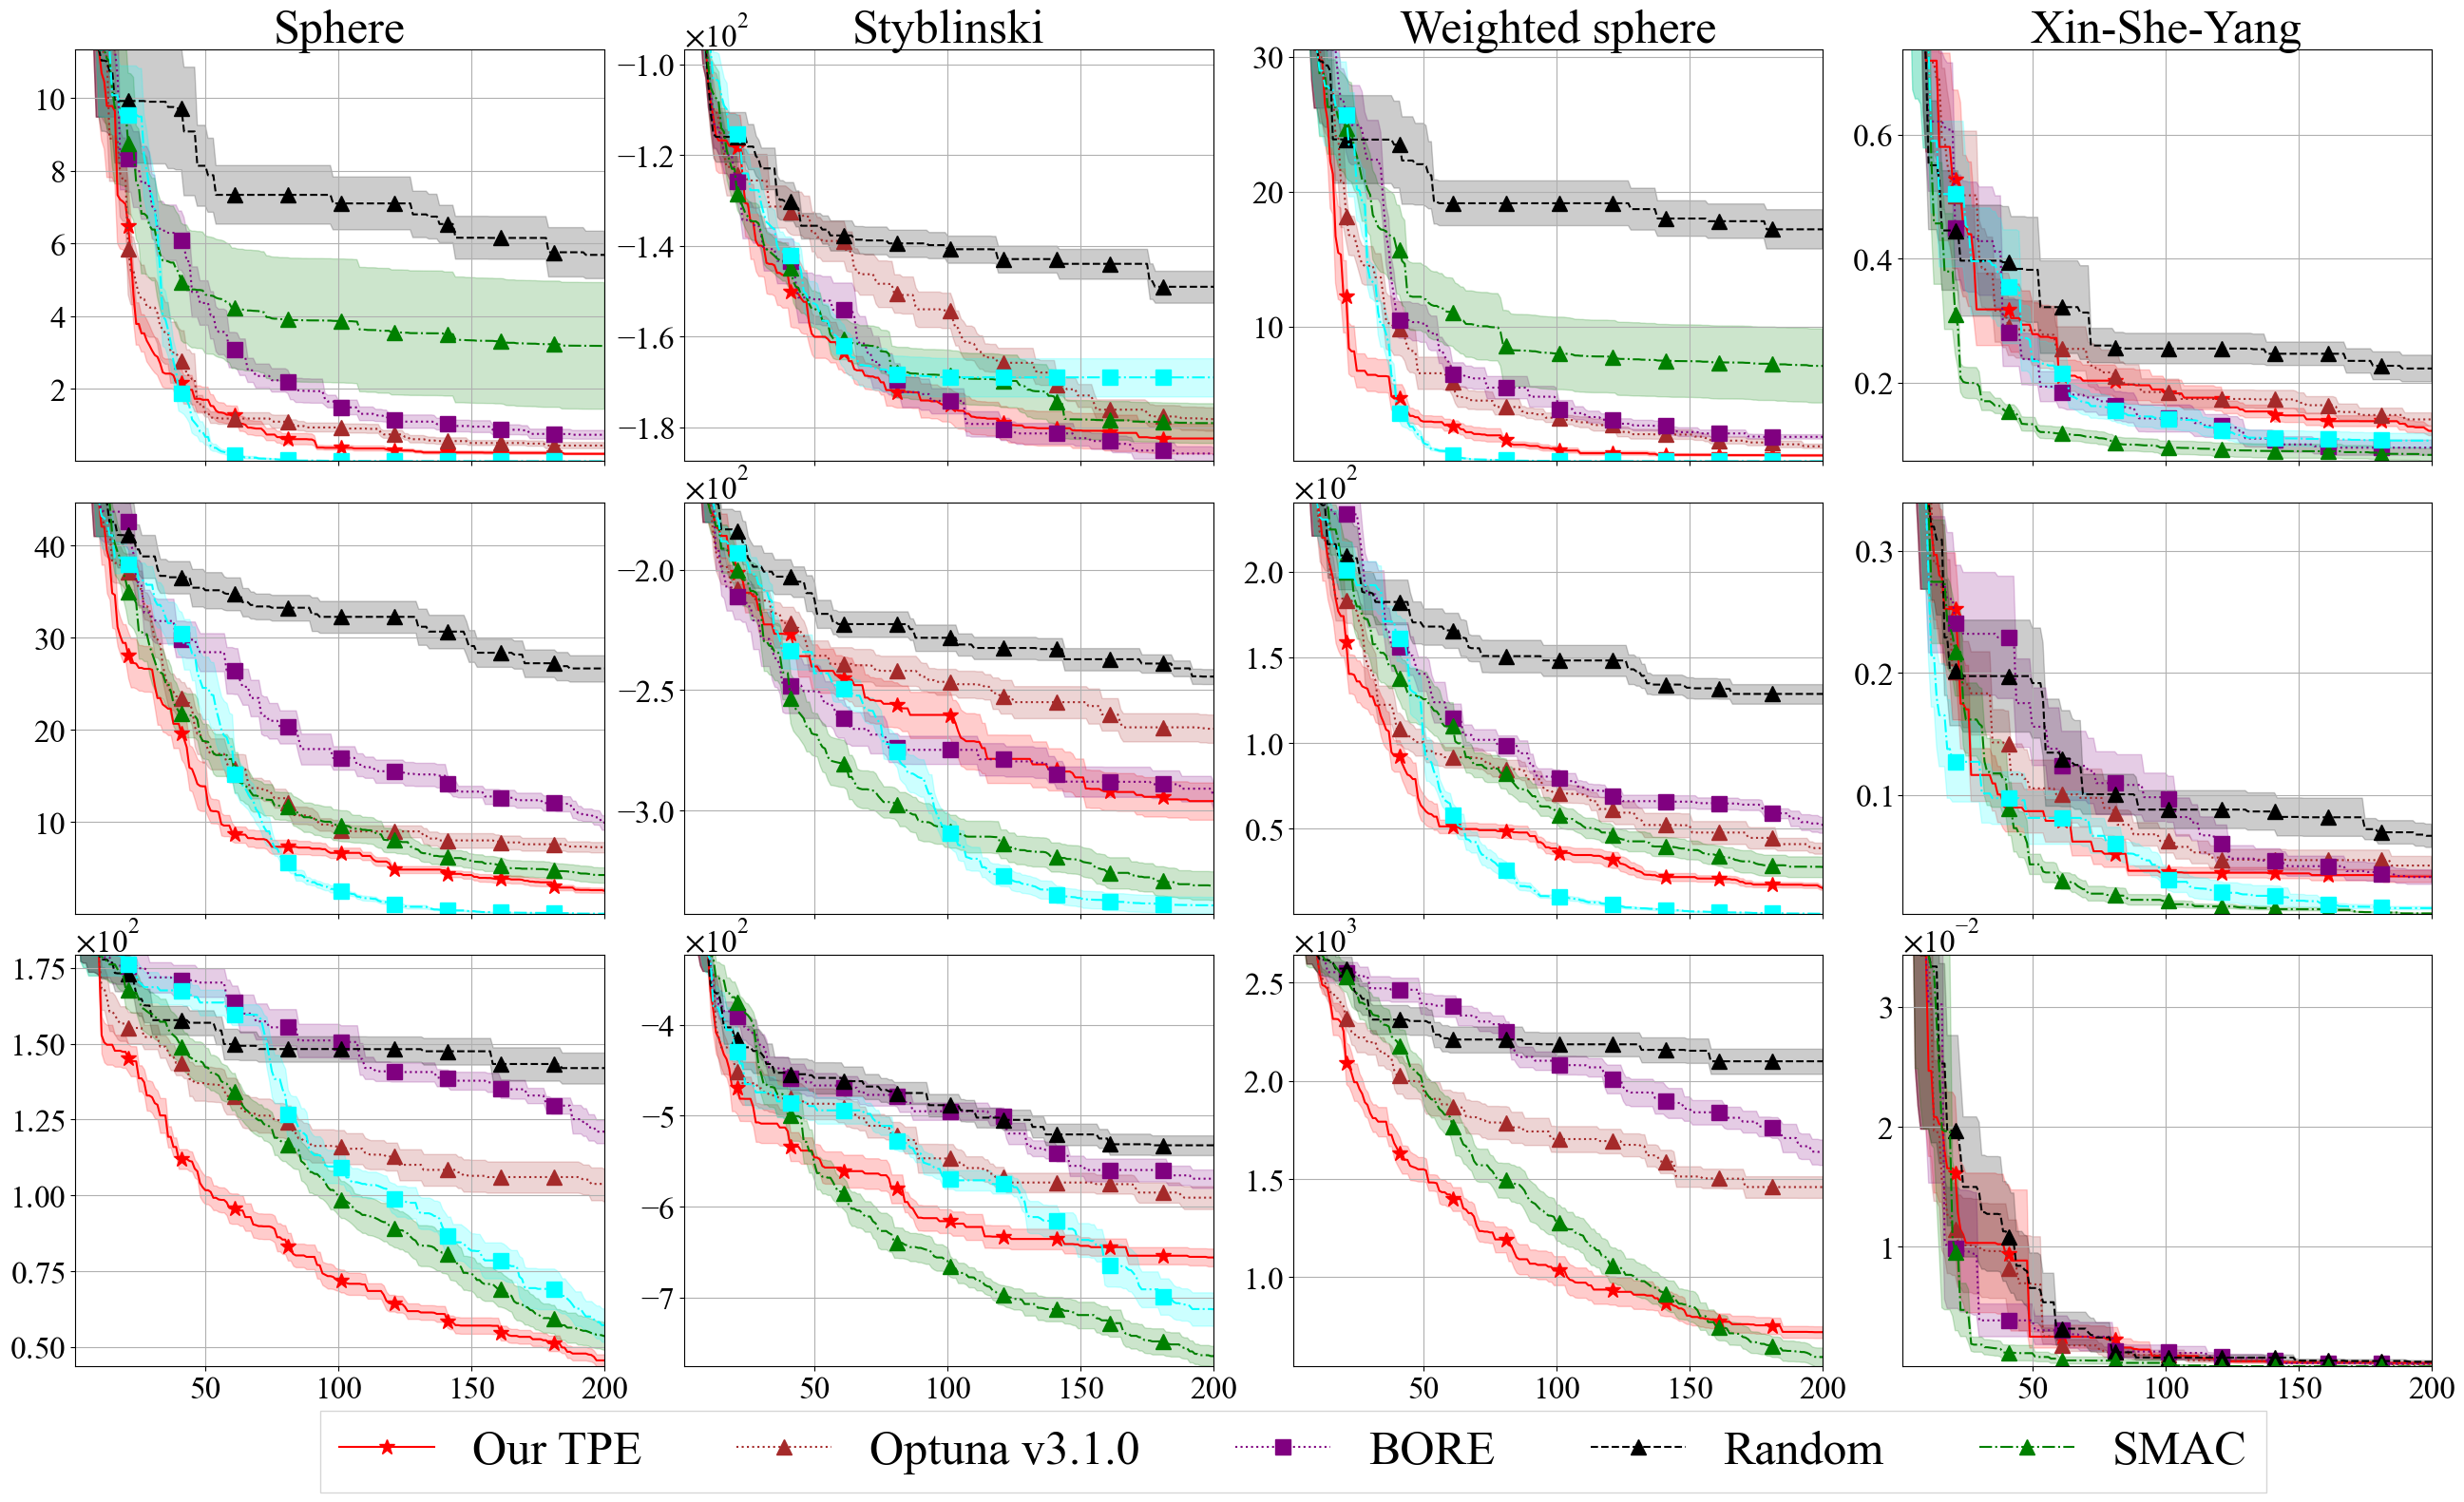

In [19]:
import matplotlib.ticker as ptick
DX = np.arange(1, 201)

COLOR_DICT = {
    TPE_OPT: "red",
    "optuna": "brown",
    "bore": "purple",
    "random": "black",
    "hebo": "blue",
    "smac": "green",
    "turbo": "cyan",
}
NAME_DICT = {
    TPE_OPT: "Our TPE",
    "optuna": "Optuna v3.1.0",
    "bore": "BORE",
    "random": "Random",
    "hebo": "HEBO",
    "smac": "SMAC",
    "turbo": "TurBO",
}
LINESTYLE_DICT = {
    TPE_OPT: None,
    "optuna": "dotted",
    "bore": "dotted",
    "random": "dashed",
    "hebo": "dashed",
    "smac": "dashdot",
    "turbo": "dashdot",
}
MARKER_DICT = {
    TPE_OPT: "*",
    "optuna": "^",
    "bore": "s",
    "random": "^",
    "hebo": "s",
    "smac": "^",
    "turbo": "s",
}
BENCH_LABEL_DICT = {
    "Ackley": "Ackley",
    "Griewank": "Griewank",
    "KTablet": "K-Tablet",
    "Levy": "Levy",
    "Perm": "Perm",
    "Rastrigin": "Rastrigin",
    "Rosenbrock": "Rosenbrock",
    "Schwefel": "Schwefel",
    "Sphere": "Sphere",
    "Styblinski": "Styblinski",
    "WeightedSphere": "Weighted sphere",
    "XinSheYang": "Xin-She-Yang",
    "parkinsons_telemonitoring": "Parkinsons telemonitoring",
    "protein_structure": "Protein structure",
    "naval_propulsion": "Naval propulsion",
    "slice_localization": "Slice localization",
    "cifar10": "CIFAR10",
    "fashion_mnist": "Fashion MNIST",
    "colorectal_histology": "Colorectal Histology",
    "vehicle": "Vehicle",
    "segment": "Segmentation",
    "car": "Car evaluation",
    "australian": "Australian credit approval",
    "credit_g": "German credit",
    "blood_transfusion": "Blood transfusion service center",
    "kc1": "KC1 software defect prediction",
    "phoneme": "Phoneme",
}


def plot(
    ax: plt.Axes,
    target_name: str,
    set_title: bool = False,
    title_fontsize: int = 36,
    **tick_params,
):
    ax.tick_params(**tick_params)
    ax.set_xlim(1, 200)

    if set_title:
        ax.set_title([BENCH_LABEL_DICT[name] for name in BENCH_LABEL_DICT if target_name.startswith(name)][0], fontsize=title_fontsize)

    ax.grid()
    ymin, ymax = np.inf, -np.inf
    lines, labels = [], []
    for opt, color in COLOR_DICT.items():
        dir_name = "results" if len(opt) < 20 else "results-bandwidth"
        try:
            results = np.asarray(json.load(open(f"{dir_name}/{opt}/{target_name}.json")))[:, :200]
            results = np.minimum.accumulate(results, axis=-1)
            m = np.mean(results, axis=0)
            s = np.std(results, axis=0) / np.sqrt(10)
            ymin, ymax = min((m - s)[-1], ymin), max(m[10], ymax)

            line, = ax.plot(
                DX, m,
                color=color,
                label=NAME_DICT[opt],
                linestyle=LINESTYLE_DICT[opt],
                marker=MARKER_DICT[opt],
                markevery=20,
                markersize=12,
            )
            lines.append(line)
            labels.append(NAME_DICT[opt])
            ax.fill_between(DX, m - s, m + s, color=color, alpha=0.2)
        except FileNotFoundError:
            print(f"Pass {opt} for {dir_name}/{opt}/{target_name}.json")

    ax.set_ylim(ymin, ymax)
    ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True))
    if ymax == ymin:
        return

    p = max(
        int(np.log(np.abs(ymax)) / np.log(10)),
        int(np.log(np.abs(ymin)) / np.log(10))
    )
    if p >= 2 or p <= -1:
        p = p if p > 0 else p - 1
        ax.ticklabel_format(style="sci", axis="y", scilimits=(p,p))

    return lines, labels


for i in range(3):
    _, axes = plt.subplots(
        ncols=4,
        nrows=3,
        sharex=True,
        figsize=(32, 18),
        gridspec_kw=dict(
            wspace=0.15,
            hspace=0.1,
        )
    )

    for col, target_name in enumerate(list(BENCH_LABEL_DICT.keys())[4*i:4*(i+1)]):
        plot(axes[0][col], f"{target_name}_05d", set_title=True)
        plot(axes[1][col], f"{target_name}_10d")
        lines, labels = plot(axes[2][col], f"{target_name}_30d")

    axes[-1][2].legend(
        handles=lines,
        loc='upper center',
        labels=labels,
        fontsize=36,
        bbox_to_anchor=(0, -0.05),  # ここは調整が必要です
        fancybox=False,
        ncol=len(labels),
    )
    plt.savefig(f"figs/bench{i}-comparison.pdf", bbox_inches="tight")

Pass hebo for results/hebo/parkinsons_telemonitoring.json
Pass hebo for results/hebo/protein_structure.json
Pass hebo for results/hebo/naval_propulsion.json
Pass hebo for results/hebo/slice_localization.json


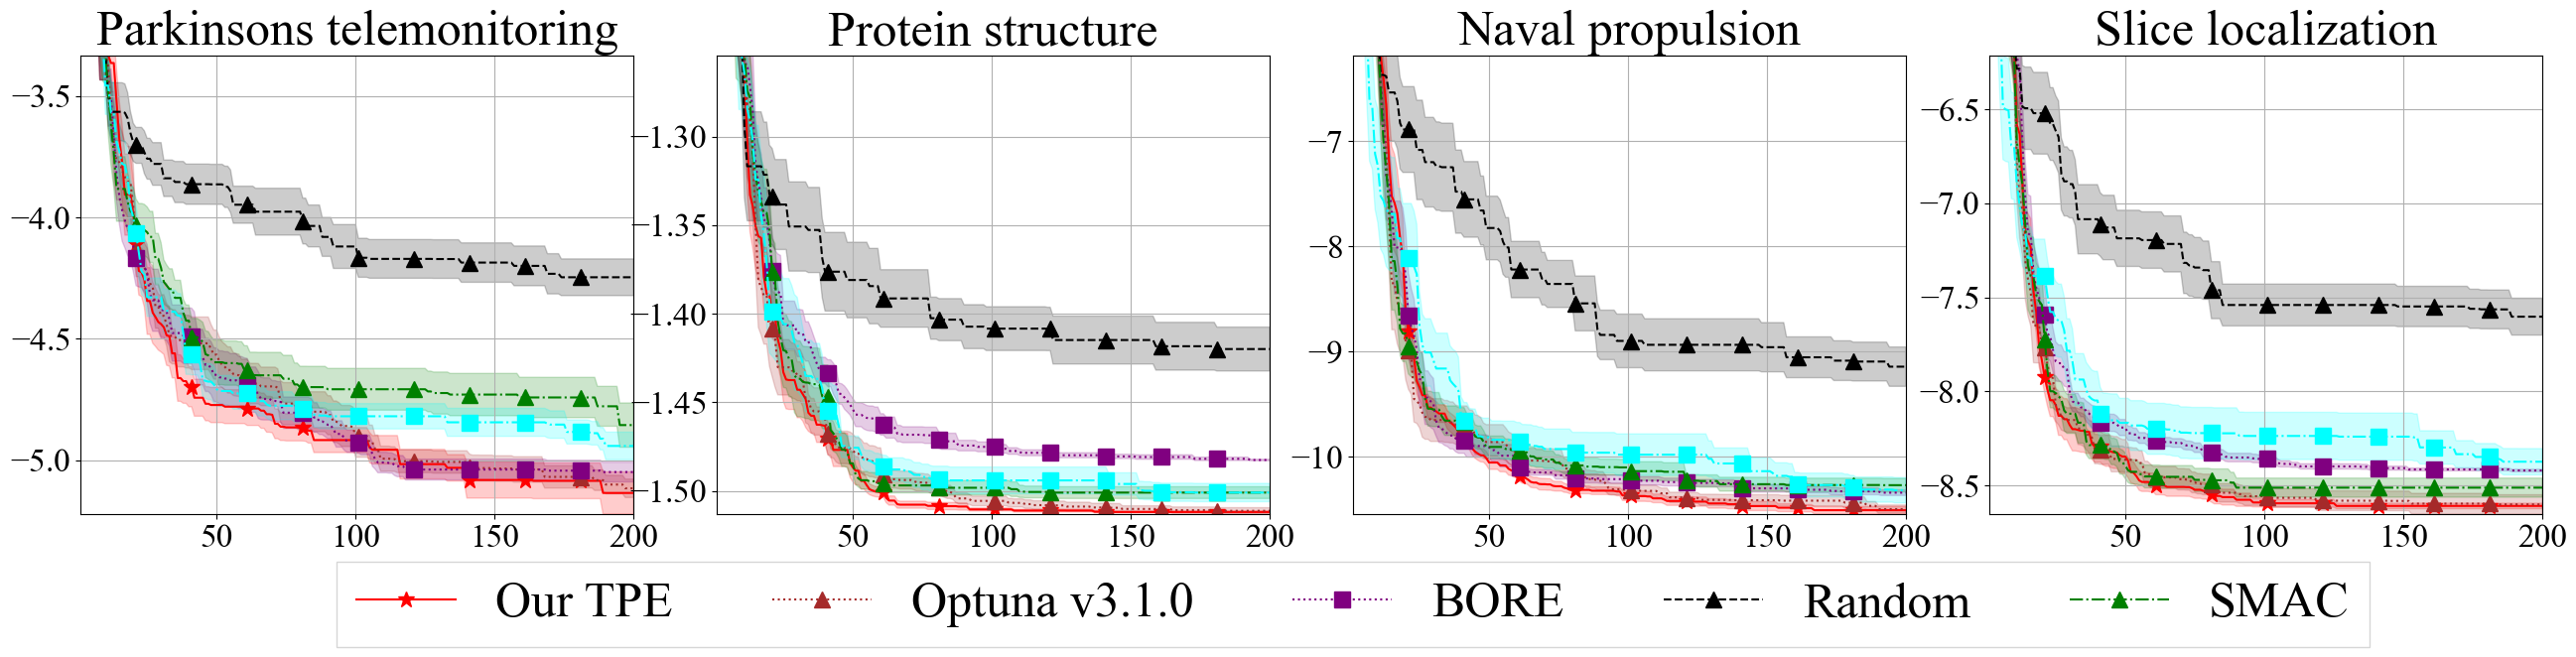

In [20]:
_, axes = plt.subplots(
    ncols=4,
    nrows=1,
    sharex=True,
    figsize=(32, 6),
    gridspec_kw=dict(
        wspace=0.15,
        hspace=0.1,
    )
)

for col, target_name in enumerate([
    "parkinsons_telemonitoring",
    "protein_structure",
    "naval_propulsion",
    "slice_localization"
]):
    lines, label = plot(axes[col], target_name, set_title=True)

axes[2].legend(
    handles=lines,
    loc='upper center',
    labels=labels,
    fontsize=36,
    bbox_to_anchor=(0, -0.05),  # ここは調整が必要です
    fancybox=False,
    ncol=len(labels),
)
plt.savefig("figs/hpolib-comparison.pdf", bbox_inches="tight")

Pass hebo for results/hebo/cifar10.json
Pass smac for results/smac/cifar10.json
Pass turbo for results/turbo/cifar10.json
Pass hebo for results/hebo/fashion_mnist.json
Pass smac for results/smac/fashion_mnist.json
Pass turbo for results/turbo/fashion_mnist.json
Pass hebo for results/hebo/colorectal_histology.json
Pass smac for results/smac/colorectal_histology.json
Pass turbo for results/turbo/colorectal_histology.json


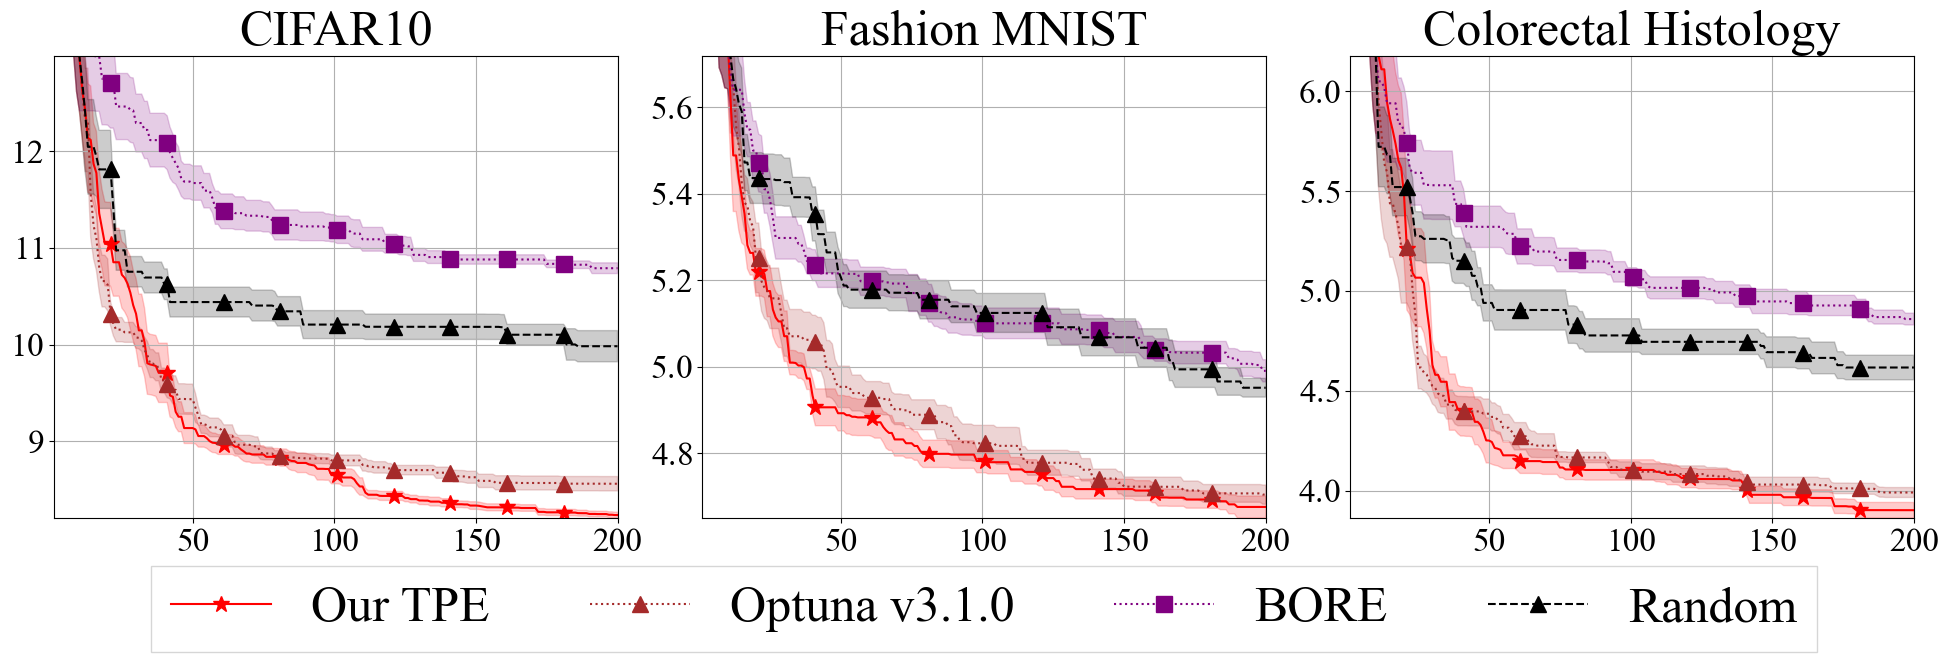

In [21]:
_, axes = plt.subplots(
    ncols=3,
    nrows=1,
    sharex=True,
    figsize=(24, 6),
    gridspec_kw=dict(
        wspace=0.15,
        hspace=0.1,
    )
)

for col, target_name in enumerate([
    "cifar10",
    "fashion_mnist",
    "colorectal_histology",
]):
    lines, labels = plot(axes[col], target_name, set_title=True)

axes[1].legend(
    handles=lines,
    loc='upper center',
    labels=labels,
    fontsize=36,
    bbox_to_anchor=(0.5, -0.05),  # ここは調整が必要です
    fancybox=False,
    ncol=len(labels),
)
plt.savefig("figs/jahs-comparison.pdf", bbox_inches="tight")

Pass hebo for results/hebo/vehicle.json
Pass hebo for results/hebo/segment.json
Pass hebo for results/hebo/car.json
Pass hebo for results/hebo/australian.json
Pass hebo for results/hebo/credit_g.json
Pass hebo for results/hebo/blood_transfusion.json
Pass hebo for results/hebo/kc1.json
Pass hebo for results/hebo/phoneme.json


/tmp/ipykernel_3191/102371840.py:111: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax.set_ylim(ymin, ymax)


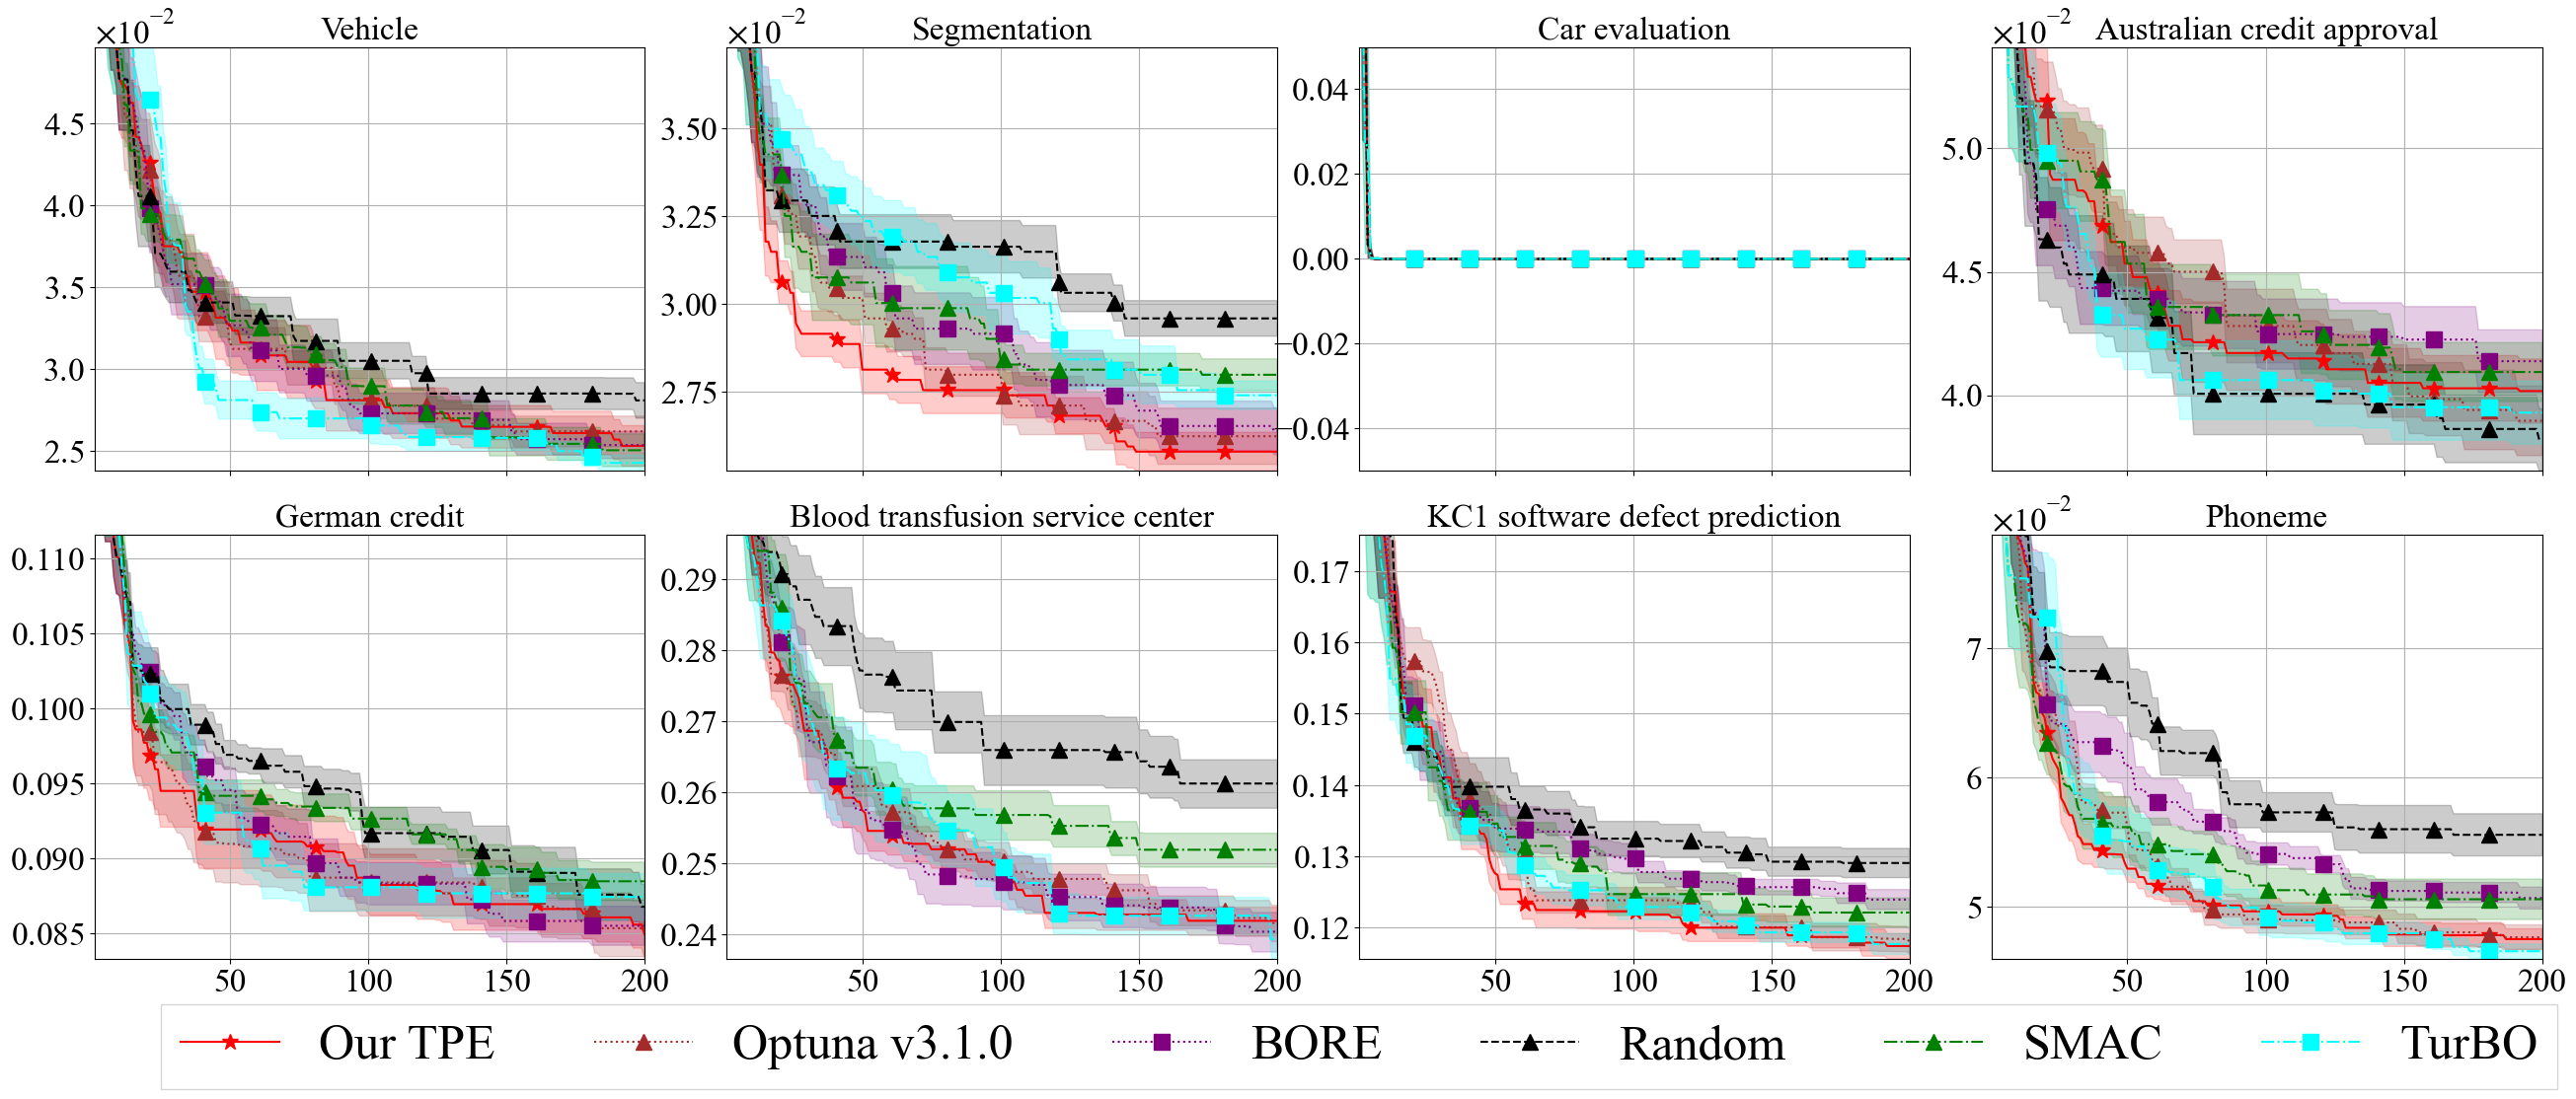

In [23]:
_, axes = plt.subplots(
    ncols=4,
    nrows=2,
    sharex=True,
    figsize=(32, 12),
    gridspec_kw=dict(
        wspace=0.15,
        hspace=0.15,
    )
)

for col, target_name in enumerate([
    "vehicle",
    "segment",
    "car",
    "australian",
    "credit_g",
    "blood_transfusion",
    "kc1",
    "phoneme",
]):
    try:
        lines, labels = plot(axes[col // 4][col % 4], target_name, set_title=True, title_fontsize=24)
    except TypeError:
        pass

axes[-1][2].legend(
    handles=lines,
    loc='upper center',
    labels=labels,
    fontsize=36,
    bbox_to_anchor=(0, -0.05),  # ここは調整が必要です
    fancybox=False,
    ncol=len(labels),
)
plt.savefig("figs/hpobench-comparison.pdf", bbox_inches="tight")

Pass results/hebo/Ackley_05d
Pass results/hebo/Griewank_05d
Pass results/hebo/KTablet_05d
Pass results/hebo/Levy_05d
Pass results/hebo/Perm_05d
Pass results/hebo/Rastrigin_05d
Pass results/hebo/Rosenbrock_05d
Pass results/hebo/Schwefel_05d
Pass results/hebo/Sphere_05d
Pass results/hebo/Styblinski_05d
Pass results/hebo/WeightedSphere_05d
Pass results/hebo/XinSheYang_05d
Pass results/hebo/Ackley_10d
Pass results/hebo/Griewank_10d
Pass results/hebo/KTablet_10d
Pass results/hebo/Levy_10d
Pass results/hebo/Perm_10d
Pass results/hebo/Rastrigin_10d
Pass results/hebo/Rosenbrock_10d
Pass results/hebo/Schwefel_10d
Pass results/hebo/Sphere_10d
Pass results/hebo/Styblinski_10d
Pass results/hebo/WeightedSphere_10d
Pass results/hebo/XinSheYang_10d
Pass results/hebo/Ackley_30d
Pass results/hebo/Griewank_30d
Pass results/hebo/KTablet_30d
Pass results/hebo/Levy_30d
Pass results/turbo/Levy_30d
Pass results/hebo/Perm_30d
Pass results/hebo/Rastrigin_30d
Pass results/hebo/Rosenbrock_30d
Pass results/turbo/

/home/shuhei/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/shuhei/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Pass results/hebo/Schwefel_30d
Pass results/hebo/Sphere_30d
Pass results/hebo/Styblinski_30d
Pass results/hebo/WeightedSphere_30d
Pass results/turbo/WeightedSphere_30d
Pass results/hebo/XinSheYang_30d
Pass results/turbo/XinSheYang_30d
Pass results/hebo/vehicle
Pass results/hebo/segment
Pass results/hebo/car
Pass results/hebo/australian
Pass results/hebo/credit_g
Pass results/hebo/blood_transfusion
Pass results/hebo/kc1
Pass results/hebo/phoneme
Pass results/hebo/parkinsons_telemonitoring
Pass results/hebo/protein_structure
Pass results/hebo/naval_propulsion
Pass results/hebo/slice_localization
Pass results/hebo/cifar10
Pass results/smac/cifar10
Pass results/turbo/cifar10
Pass results/hebo/fashion_mnist
Pass results/smac/fashion_mnist
Pass results/turbo/fashion_mnist
Pass results/hebo/colorectal_histology
Pass results/smac/colorectal_histology
Pass results/turbo/colorectal_histology


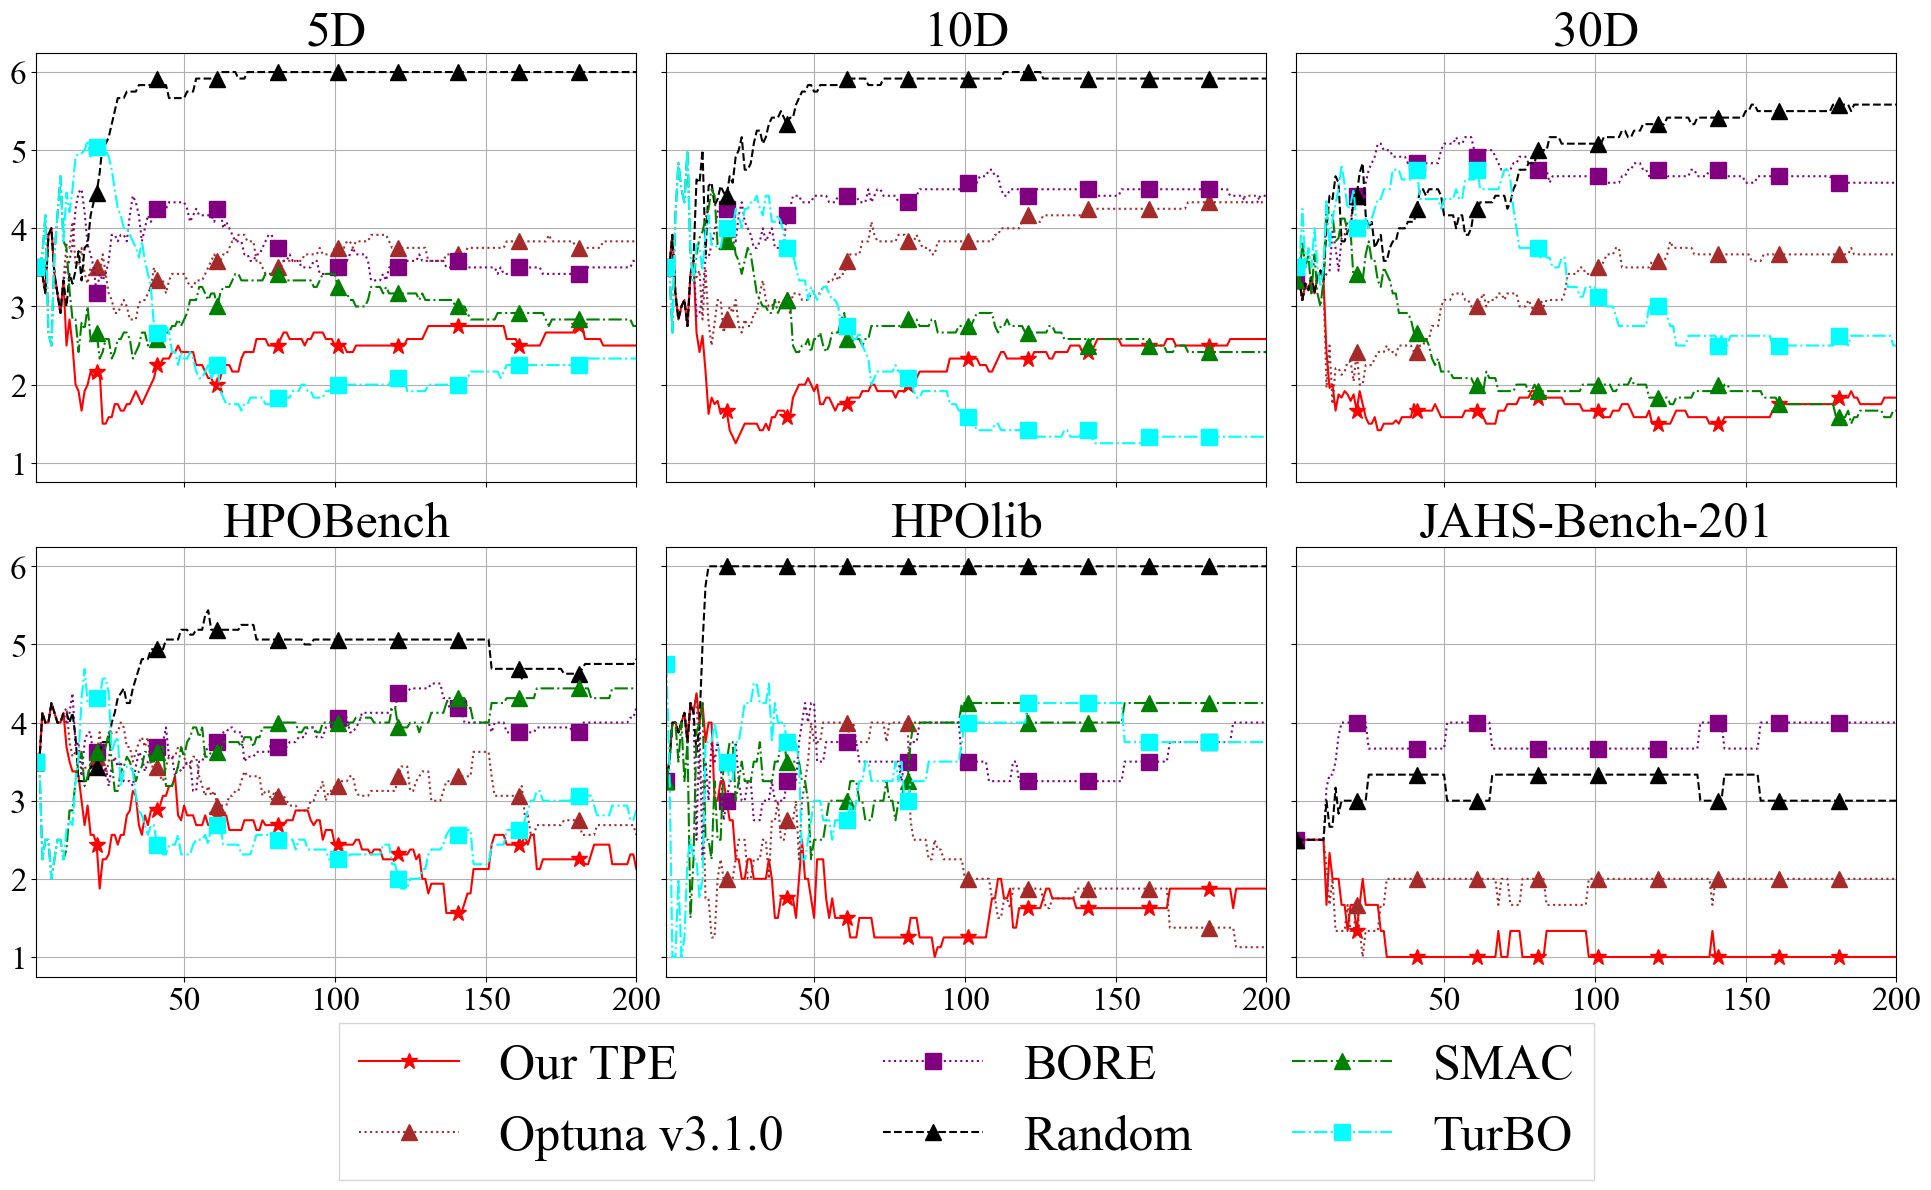

In [24]:
from scipy.stats import rankdata


def collect_rank(target_name: str):
    meds_data = {}
    for opt in COLOR_DICT.keys():
        dir_name = "results" if len(opt) < 20 else "results-bandwidth"
        try:
            results = np.asarray(json.load(open(f"{dir_name}/{opt}/{target_name}.json")))[:, :200]
            results = np.minimum.accumulate(results, axis=-1)
            meds_data[opt] = np.median(results, axis=0)
        except FileNotFoundError:
            print(f"Pass {dir_name}/{opt}/{target_name}")
    
    # shape: (n_opts, 200)
    rank_array = rankdata([v for v in meds_data.values()], axis=0)
    rank_data = {opt: rank_array[i] for i, opt in enumerate(meds_data.keys())}
    return rank_data


def plot_rank(ax, title, avg_rank):
    lines, labels = [], []
    ax.set_xlim(1, 200)
    ax.grid()
    ax.set_title(title, fontsize=36)
    for opt, rank in avg_rank.items():
        if rank.size < 200:
            continue

        line, = ax.plot(
            DX, rank,
            color=COLOR_DICT[opt],
            linestyle=LINESTYLE_DICT[opt],
            marker=MARKER_DICT[opt],
            markevery=20,
            markersize=12,
        )
        labels.append(NAME_DICT[opt])
        lines.append(line)

    return lines, labels

rank_collection = {opt: [] for opt in COLOR_DICT.keys()}
results = {}
bench_names = [
    "Ackley", "Griewank", "KTablet", "Levy", "Perm", "Rastrigin",
    "Rosenbrock", "Schwefel", "Sphere", "Styblinski", "WeightedSphere", "XinSheYang",
]
hpolib_names = ["parkinsons_telemonitoring", "protein_structure", "naval_propulsion", "slice_localization"]
hpobench_names = ["vehicle", "segment", "car", "australian", "credit_g", "blood_transfusion", "kc1", "phoneme"]
jahs_names = ["cifar10", "fashion_mnist", "colorectal_histology"]

_, axes = plt.subplots(
    ncols=3,
    nrows=2,
    sharex=True,
    sharey=True,
    figsize=(24, 12),
    gridspec_kw=dict(
        wspace=0.05,
        hspace=0.15,
    )
)

for col, d in enumerate(["_05d", "_10d", "_30d"]):
    rank_collection = {opt: [] for opt in COLOR_DICT.keys()}
    results = {}
    for target_name in bench_names:
        for opt, rank in collect_rank(f"{target_name}{d}").items():
            rank_collection[opt].append(rank)
    else:
        for opt, rank in rank_collection.items():
            results[opt] = np.mean(rank, axis=0)

    lines, labels = plot_rank(axes[0][col], title=["5D", "10D", "30D"][col], avg_rank=results)

axes[-1][1].legend(
    handles=lines,
    loc='upper center',
    labels=labels,
    fontsize=36,
    bbox_to_anchor=(0.5, -0.05),  # ここは調整が必要です
    fancybox=False,
    ncol=(len(labels) + 1) // 2,
)

for col, benches in enumerate([hpobench_names, hpolib_names, jahs_names]):
    rank_collection = {opt: [] for opt in COLOR_DICT.keys()}
    results = {}
    for target_name in benches:
        for opt, rank in collect_rank(f"{target_name}").items():
            rank_collection[opt].append(rank)
    else:
        for opt, rank in rank_collection.items():
            results[opt] = np.mean(rank, axis=0)

    plot_rank(axes[1][col], title=["HPOBench", "HPOlib", "JAHS-Bench-201"][col], avg_rank=results)

plt.savefig("figs/avgrank-comparison.pdf", bbox_inches="tight")